In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import models, layers
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
df = pd.read_csv(
"https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")
train = df[5000:]
test = df[:5000]
x = train.drop(['label'], axis=1)
y = train['label']

In [5]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    keras.backend.get_session().run(
        tf.local_variables_initializer())
    return auc
    
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',metrics=[auc])

In [8]:
history = model.fit(x,
                    y,
                    epochs=100,
                    batch_size=100,
                    validation_split = .2,
                    verbose=1)

Train on 14324 samples, validate on 3581 samples
Epoch 1/100
14324/14324 [==============================] - 1s 64us/step - loss: 0.3556 - auc: 0.6141 - val_loss: 0.2766 - val_auc: 0.7195
Epoch 2/100
14324/14324 [==============================] - 1s 56us/step - loss: 0.3099 - auc: 0.7507 - val_loss: 0.2692 - val_auc: 0.7652
Epoch 3/100
14324/14324 [==============================] - 1s 46us/step - loss: 0.3073 - auc: 0.7760 - val_loss: 0.2663 - val_auc: 0.7812
Epoch 4/100
14324/14324 [==============================] - 1s 52us/step - loss: 0.3057 - auc: 0.7858 - val_loss: 0.2611 - val_auc: 0.7892
Epoch 5/100
14324/14324 [==============================] - 1s 51us/step - loss: 0.3039 - auc: 0.7929 - val_loss: 0.2661 - val_auc: 0.7949
Epoch 6/100
14324/14324 [==============================] - 1s 44us/step - loss: 0.3046 - auc: 0.7970 - val_loss: 0.2663 - val_auc: 0.7980
Epoch 7/100
14324/14324 [==============================] - 1s 48us/step - loss: 0.3038 - auc: 0.8000 - val_loss: 0.2667 - v

14324/14324 [==============================] - 1s 62us/step - loss: 0.2978 - auc: 0.8165 - val_loss: 0.2639 - val_auc: 0.8165
Epoch 60/100
14324/14324 [==============================] - 1s 70us/step - loss: 0.2982 - auc: 0.8166 - val_loss: 0.2681 - val_auc: 0.8166
Epoch 61/100
14324/14324 [==============================] - 1s 63us/step - loss: 0.2993 - auc: 0.8166 - val_loss: 0.2628 - val_auc: 0.8166
Epoch 62/100
14324/14324 [==============================] - 1s 67us/step - loss: 0.2982 - auc: 0.8167 - val_loss: 0.2630 - val_auc: 0.8167
Epoch 63/100
14324/14324 [==============================] - 1s 61us/step - loss: 0.2977 - auc: 0.8168 - val_loss: 0.2623 - val_auc: 0.8168
Epoch 64/100
14324/14324 [==============================] - 1s 66us/step - loss: 0.2981 - auc: 0.8168 - val_loss: 0.2622 - val_auc: 0.8168
Epoch 65/100
14324/14324 [==============================] - 1s 54us/step - loss: 0.2981 - auc: 0.8169 - val_loss: 0.2630 - val_auc: 0.8169
Epoch 66/100
14324/14324 [==============

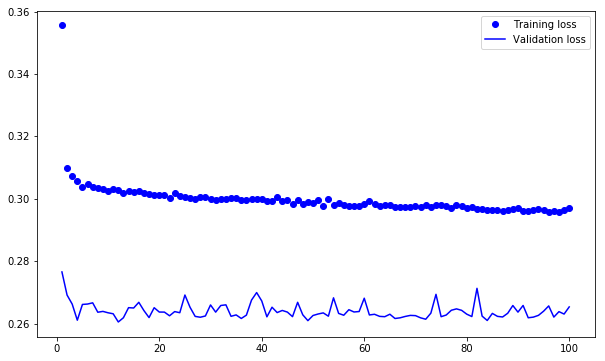

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10,6)) 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

In [11]:
x_test = test.drop(['label'], axis=1)
y_test = test['label']
results = model.evaluate(x_test, y_test, verbose = 0)
results


[0.38499287114143371, 0.81843739318847653]